# Step 7: Characters extraction

Extracts characters from annotated license plates to create new dataset.

## Imports

In [1]:
import os
from glob import glob
from xml.etree import ElementTree as ET

import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.local_utils.constants import (
    RU_PLATES_IMAGES_PATH,
    RU_PLATES_ANNOTATIONS_PATH,
    RU_CHARACTERS_IMAGES_PATH,
    CHARACTERS_SIZE
)
from src.local_utils.image_utils.plot import plot_image

## Creating dataset

In [2]:
images = os.listdir(RU_PLATES_IMAGES_PATH)
annotations = os.listdir(RU_PLATES_ANNOTATIONS_PATH)

for i, xml in enumerate(glob(os.path.join(RU_PLATES_ANNOTATIONS_PATH, '*.xml'))):
    tree = ET.parse(xml)
    root = tree.getroot()

    image = np.array(cv2.imread(os.path.join(RU_PLATES_IMAGES_PATH, images[i])), dtype=np.uint8)

    for elem in root.findall('object'):
        try:
            classname = elem.find('name').text

            bndbox = elem.find('bndbox')
            x1, y1, x2, y2 = list(map(lambda x: int(x.text), [bndbox[0], bndbox[1], bndbox[2], bndbox[3]]))

            classname_path = os.path.join(RU_CHARACTERS_IMAGES_PATH, classname)
            if not os.path.exists(classname_path):
                os.makedirs(classname_path)
                file_index = 0
            else:
                file_index = len(os.listdir(classname_path))

            plt.imsave(
                os.path.join(classname_path, f'{file_index}.jpg'),
                cv2.resize(image[y1:y2, x1:x2].copy(), CHARACTERS_SIZE)
            )
        except TypeError as e:
            print(xml)
            print(e)

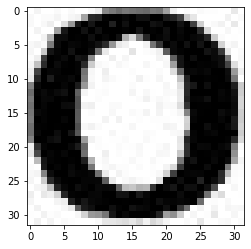

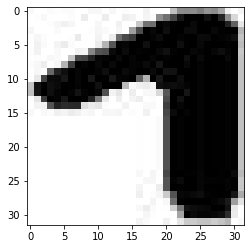

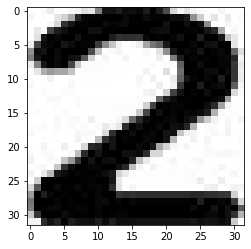

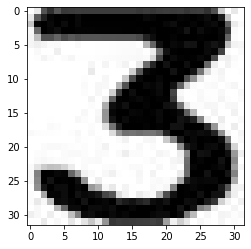

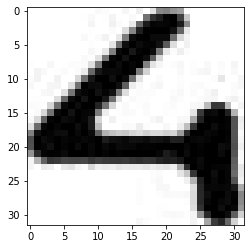

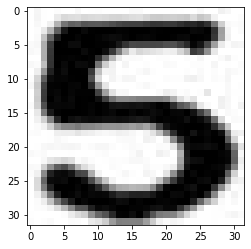

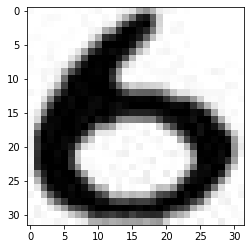

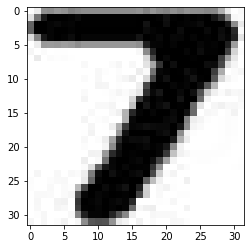

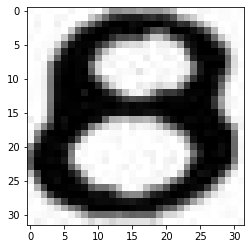

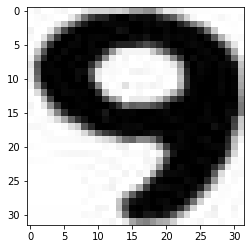

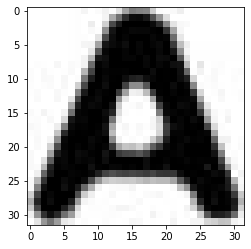

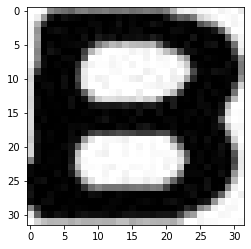

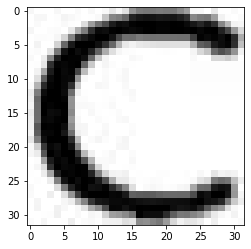

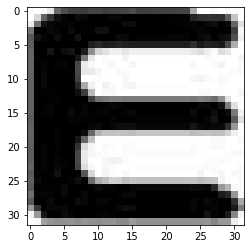

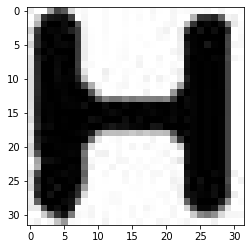

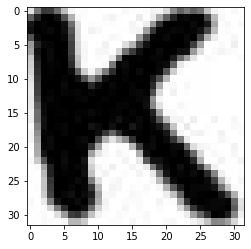

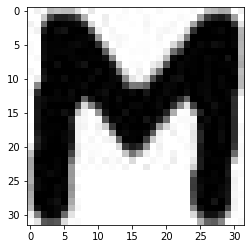

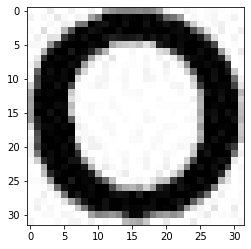

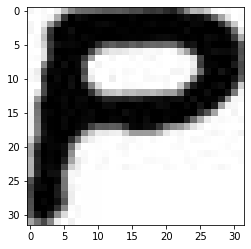

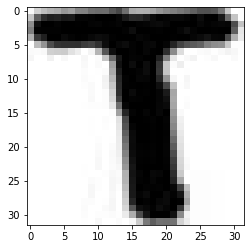

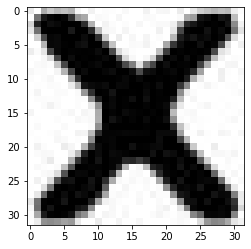

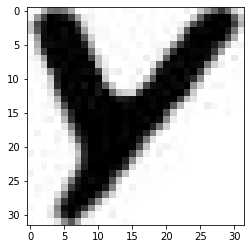

In [3]:
classname_paths = list(map(lambda x: os.path.join(RU_CHARACTERS_IMAGES_PATH, x), os.listdir(RU_CHARACTERS_IMAGES_PATH)))
for classname_path in classname_paths:
    character_path = os.path.join(classname_path, os.listdir(classname_path)[0])
    image = np.array(cv2.imread(character_path), dtype=np.uint8)
    plot_image(image)